Mean Squared Error (MSE): 0.032195316432799555
Accuracy (threshold = 0.5): 0.9918857142857143
Confusion Matrix:
 [[17383   159]
 [  125 17333]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     17542
         1.0       0.99      0.99      0.99     17458

    accuracy                           0.99     35000
   macro avg       0.99      0.99      0.99     35000
weighted avg       0.99      0.99      0.99     35000



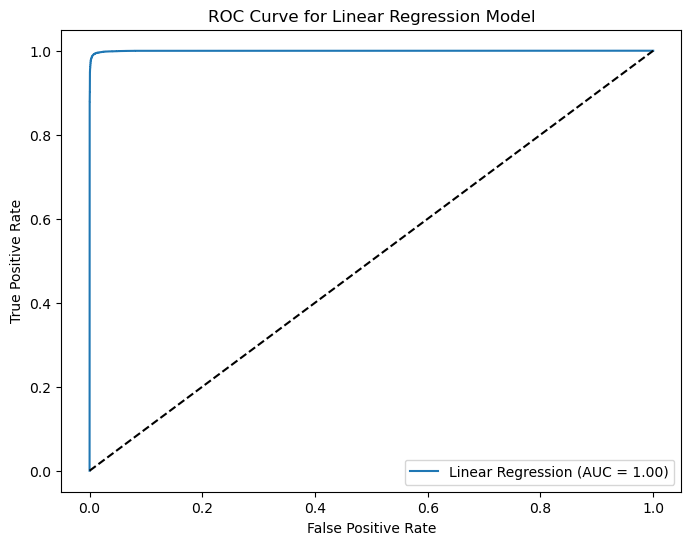

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("heart_disease_risk_dataset_earlymed.csv")

scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

X = df.drop(columns=['Heart_Risk'])
y = df['Heart_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_continuous = lr_model.predict(X_test)

y_pred_binary = (y_pred_continuous >= 0.5).astype(int)

mse = mean_squared_error(y_test, y_pred_continuous)
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
report = classification_report(y_test, y_pred_binary)

print("Mean Squared Error (MSE):", mse)
print("Accuracy (threshold = 0.5):", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_continuous)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Linear Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Linear Regression Model")
plt.legend()
plt.show()
